In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle 


In [2]:
df_res_drif = pd.read_pickle("/srv/scratch/z5297792/ESP_Paper_Data/df_res_drifter_ESPRA.pkl")
df_res_sat = pd.read_pickle("/srv/scratch/z5297792/ESP_Paper_Data/df_res_satellite_ESPRA.pkl")
df_res_sadcp = pd.read_pickle("/srv/scratch/z5297792/ESP_Paper_Data/df_res_sadcp_ESPRA.pkl")


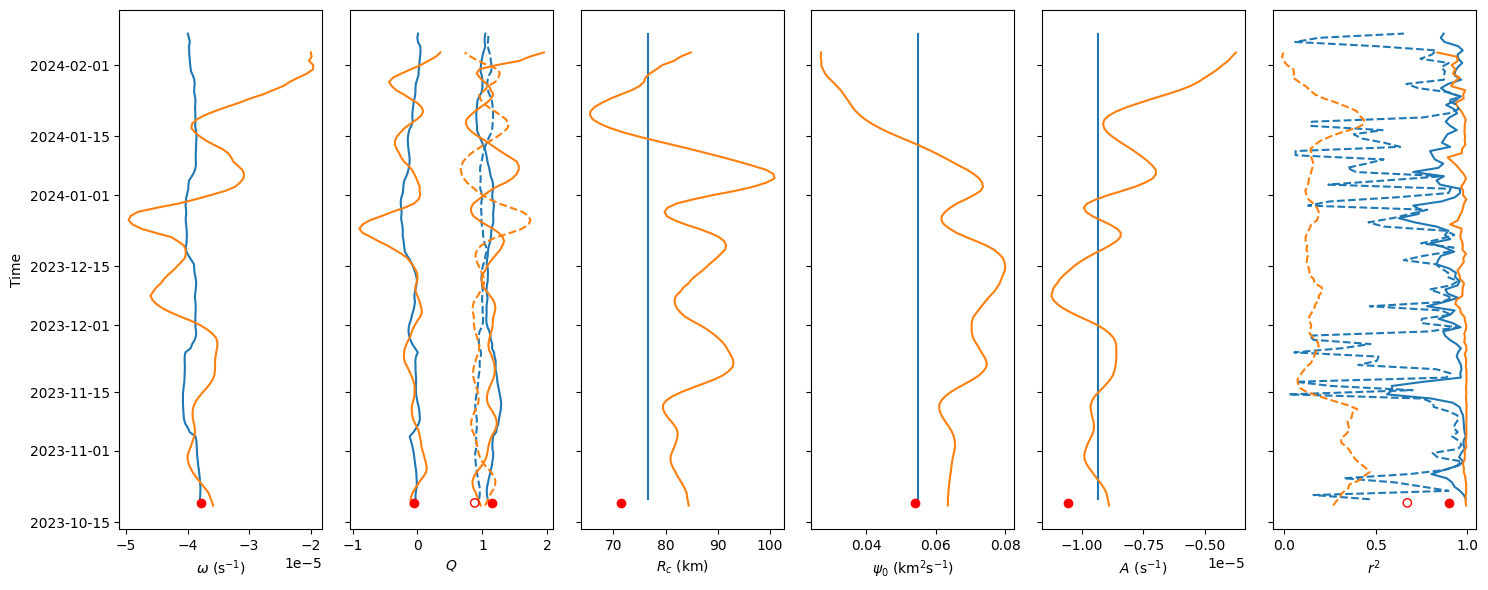

In [3]:
data = df_res_sadcp.iloc[0]
colors = plt.get_cmap('tab10').colors

fig, axs = plt.subplots(1, 6, figsize=(15,6), sharey=True)
alpha = .4

axs[0].plot(df_res_drif.sw, df_res_drif.Time, color=colors[0])
axs[0].plot(df_res_sat.sw, df_res_sat.Time, color=colors[1])
# axs[0].vlines(x=data.sw, color='r', ymin=data.Time_min, ymax=data.Time_max, zorder=10)
axs[0].scatter(data.sw, data.Time_mean, color='r', zorder=5)
axs[0].set_xlabel(r'$\omega$ (s$^{-1}$)')

axs[1].plot(df_res_drif.sq11, df_res_drif.Time, color=colors[0])
axs[1].plot(df_res_drif.sq12, df_res_drif.Time, color=colors[0])
axs[1].plot(df_res_drif.sq22, df_res_drif.Time, color=colors[0], ls='--')

axs[1].plot(df_res_sat.sq11, df_res_sat.Time, color=colors[1])
axs[1].plot(df_res_sat.sq12, df_res_sat.Time, color=colors[1])
axs[1].plot(df_res_sat.sq22, df_res_sat.Time, color=colors[1], ls='--')

axs[1].scatter(data.sq11, data.Time_mean, color='r', zorder=5)
axs[1].scatter(data.sq12, data.Time_mean, color='r', zorder=5)
axs[1].scatter(data.sq22, data.Time_mean, color='r', zorder=5, facecolors='none')

# axs[1].vlines(x=data.sq11, color='r', ymin=data.Time_min, ymax=data.Time_max, zorder=10)
# axs[1].vlines(x=data.sq12, color='r', ymin=data.Time_min, ymax=data.Time_max, zorder=10)
# axs[1].vlines(x=data.sq22, color='r', lw=2, ymin=data.Time_min, ymax=data.Time_max, zorder=10)

axs[1].set_xlabel(r'$Q$')

axs[2].plot(df_res_drif.sRc/1e3, df_res_drif.Time, color=colors[0])
axs[2].plot(df_res_sat.sRc/1e3, df_res_sat.Time, color=colors[1])
# axs[2].vlines(x=data.sRc/1e3, color='r', ymin=data.Time_min, ymax=data.Time_max, zorder=10)
axs[2].scatter(data.sRc/1e3, data.Time_mean, color='r', zorder=5)
axs[2].set_xlabel(r'$R_c$ (km)')

axs[3].plot(df_res_drif.spsi0/1e6, df_res_drif.Time, color=colors[0])
axs[3].plot(df_res_sat.spsi0/1e6, df_res_sat.Time, color=colors[1])
# axs[3].vlines(x=data.spsi0/1e6, color='r', ymin=data.Time_min, ymax=data.Time_max, zorder=10)
axs[3].scatter(data.spsi0/1e6, data.Time_mean, color='r', zorder=5)
axs[3].set_xlabel(r'$\psi_0$ (km$^2$s$^{-1}$)')

axs[4].plot(df_res_drif.sA, df_res_drif.Time, color=colors[0])
axs[4].plot(df_res_sat.sA, df_res_sat.Time, color=colors[1])
# axs[4].vlines(x=data.sA, color='r', ymin=data.Time_min, ymax=data.Time_max, zorder=10)
axs[4].scatter(data.sA, data.Time_mean, color='r', zorder=5)
axs[4].set_xlabel(r'$A$ (s$^{-1}$)')

axs[5].plot(df_res_drif.r2_1, df_res_drif.Time, color=colors[0])
axs[5].plot(df_res_sat.r2_1, df_res_sat.Time, color=colors[1])
# axs[5].vlines(x=data.r2_1, color='r', ymin=data.Time_min, ymax=data.Time_max, zorder=10)
axs[5].scatter(data.r2_1, data.Time_mean, color='r', zorder=5)
axs[5].plot(df_res_drif.r2_2, df_res_drif.Time, color=colors[0], ls='--')
axs[5].plot(df_res_sat.r2_2, df_res_sat.Time, color=colors[1], ls='--')
# axs[5].vlines(x=data.r2_2, color='r', ymin=data.Time_min, ymax=data.Time_max, zorder=10)
axs[5].scatter(data.r2_2, data.Time_mean, color='r', zorder=5, facecolors='none')
axs[5].set_xlabel(r'$r^2$')

# for ax in axs:
#     ax.grid(True)
axs[0].set_ylabel('Time')

plt.tight_layout()


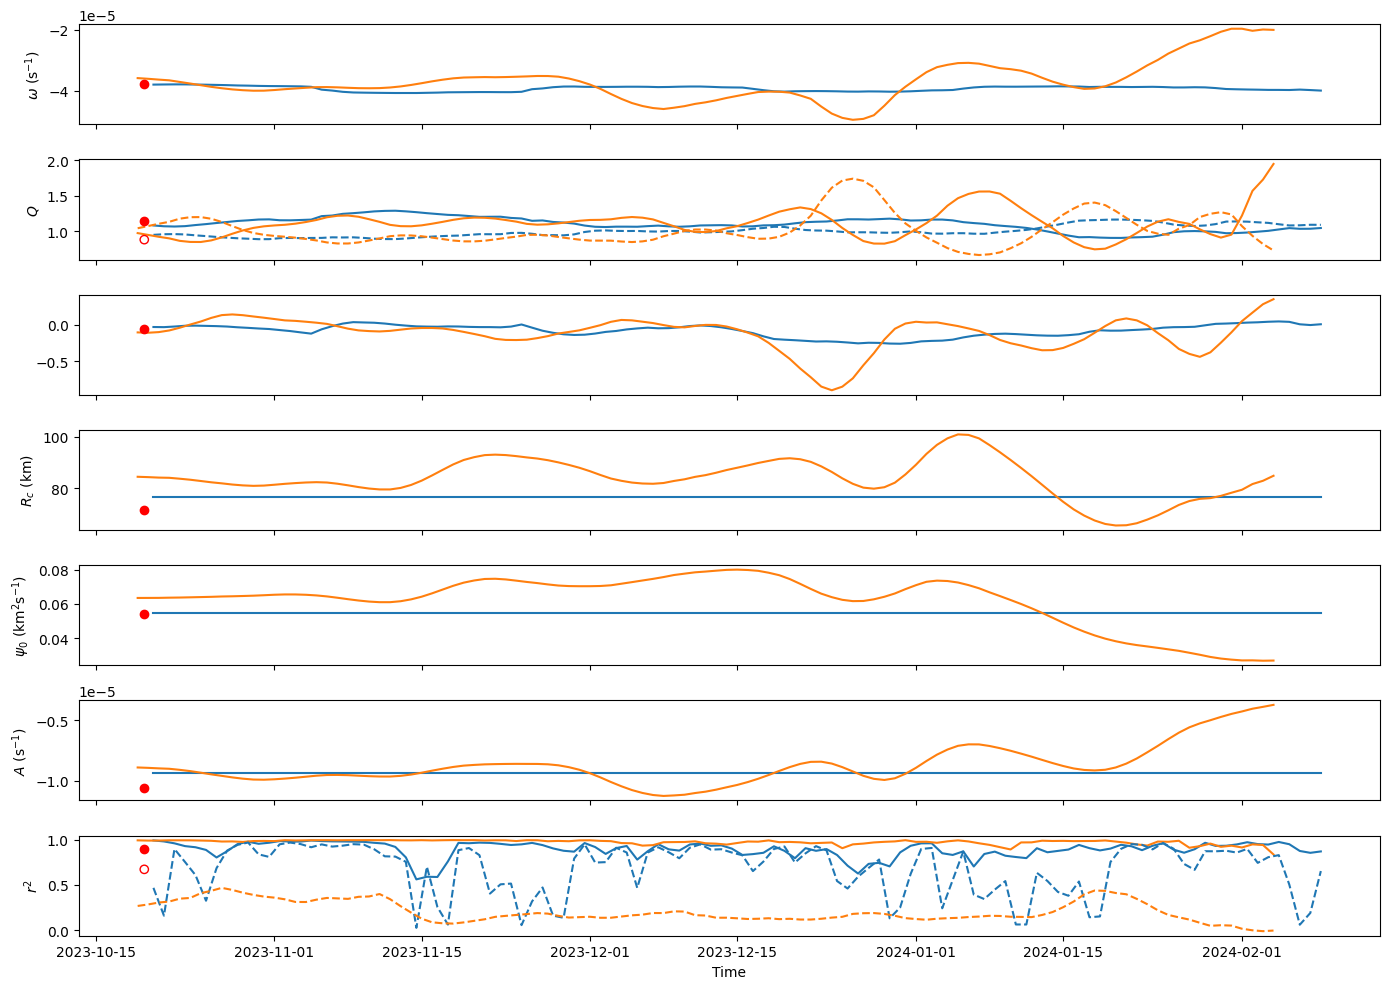

In [4]:
data = df_res_sadcp.iloc[0]
colors = plt.get_cmap('tab10').colors

fig, axs = plt.subplots(7, 1, figsize=(14, 10), sharex=True)
alpha = .4

axs[0].plot(df_res_drif.Time, df_res_drif.sw, color=colors[0])
axs[0].plot(df_res_sat.Time, df_res_sat.sw, color=colors[1])
axs[0].scatter(data.Time_mean, data.sw, color='r', zorder=5)
axs[0].set_ylabel(r'$\omega$ (s$^{-1}$)')

axs[1].plot(df_res_drif.Time, df_res_drif.sq11, color=colors[0])
axs[2].plot(df_res_drif.Time, df_res_drif.sq12, color=colors[0])
axs[1].plot(df_res_drif.Time, df_res_drif.sq22, color=colors[0], ls='--')
axs[1].plot(df_res_sat.Time, df_res_sat.sq11, color=colors[1])
axs[2].plot(df_res_sat.Time, df_res_sat.sq12, color=colors[1])
axs[1].plot(df_res_sat.Time, df_res_sat.sq22, color=colors[1], ls='--')
axs[1].scatter(data.Time_mean, data.sq11, color='r', zorder=5)
axs[2].scatter(data.Time_mean, data.sq12, color='r', zorder=5)
axs[1].scatter(data.Time_mean, data.sq22, color='r', zorder=5, facecolors='none')
axs[1].set_ylabel(r'$Q$')

axs[3].plot(df_res_drif.Time, df_res_drif.sRc/1e3, color=colors[0])
axs[3].plot(df_res_sat.Time, df_res_sat.sRc/1e3, color=colors[1])
axs[3].scatter(data.Time_mean, data.sRc/1e3, color='r', zorder=5)
axs[3].set_ylabel(r'$R_c$ (km)')

axs[4].plot(df_res_drif.Time, df_res_drif.spsi0/1e6, color=colors[0])
axs[4].plot(df_res_sat.Time, df_res_sat.spsi0/1e6, color=colors[1])
axs[4].scatter(data.Time_mean, data.spsi0/1e6, color='r', zorder=5)
axs[4].set_ylabel(r'$\psi_0$ (km$^2$s$^{-1}$)')

axs[5].plot(df_res_drif.Time, df_res_drif.sA, color=colors[0])
axs[5].plot(df_res_sat.Time, df_res_sat.sA, color=colors[1])
axs[5].scatter(data.Time_mean, data.sA, color='r', zorder=5)
axs[5].set_ylabel(r'$A$ (s$^{-1}$)')

axs[6].plot(df_res_drif.Time, df_res_drif.r2_1, color=colors[0])
axs[6].plot(df_res_sat.Time, df_res_sat.r2_1, color=colors[1])
axs[6].plot(df_res_drif.Time, df_res_drif.r2_2, color=colors[0], ls='--')
axs[6].plot(df_res_sat.Time, df_res_sat.r2_2, color=colors[1], ls='--')
axs[6].scatter(data.Time_mean, data.r2_1, color='r', zorder=5)
axs[6].scatter(data.Time_mean, data.r2_2, color='r', zorder=5, facecolors='none')
axs[6].set_ylabel(r'$r^2$')
axs[6].set_xlabel('Time')

# for ax in axs:
    # ax.grid(True)

plt.tight_layout()



Text(0, 0.5, 'y (km)')

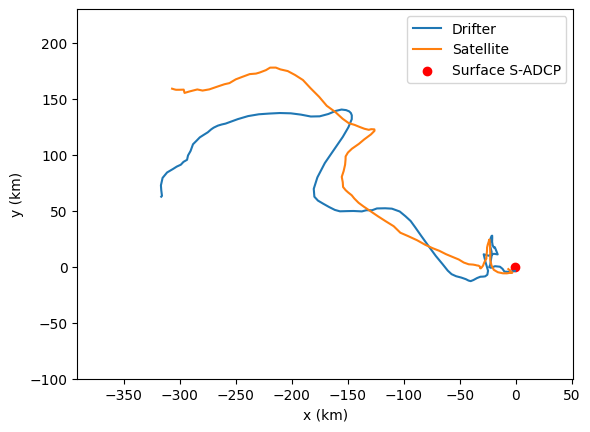

In [5]:
plt.plot(df_res_drif.sxc/1e3, df_res_drif.syc/1e3, label='Drifter')
plt.plot(df_res_sat.sxc/1e3, df_res_sat.syc/1e3, label='Satellite')
plt.scatter(data.sxc/1e3, data.syc/1e3, color='r', label='Surface S-ADCP')
plt.axis('equal'); plt.legend()
plt.xlim(-440, 100); plt.ylim(-100, 230)
plt.xlabel('x (km)'); plt.ylabel('y (km)')


In [6]:
df_res_sadcp


,xc,yc,w,Q,Rc,psi0,A,r2_1,r2_2,Depth,...,sq12,sq22,sRc,spsi0,sA,Time_min,Time_max,Time_mean,Data,Method
0,-451.605262,-849.184148,-0.000038,"[[1.1312061838979988, -0.04918842388725238], [...",70596.642706,53681.932286,-0.000011,0.900779,0.671786,37,...,-0.061226,0.880895,71391.400908,53916.302482,-0.000011,2023-10-17 10:27:31.000004,2023-10-21 22:27:30.333340,2023-10-19 15:05:34.950679808,SADCP,ESPRA
1,-438.441250,-813.024330,-0.000038,"[[1.138066313381316, -0.05797818694163663], [-...",71271.872967,53871.172129,-0.000011,0.902483,0.640167,47,...,-0.067775,0.879453,71972.001653,54093.342923,-0.000010,2023-10-17 10:27:31.000004,2023-10-21 22:27:30.333340,2023-10-19 15:05:34.950679808,SADCP,ESPRA
2,-130.968639,-357.449572,-0.000037,"[[1.1496814830574626, -0.07651004778684618], [...",72305.687050,54195.803030,-0.000010,0.893556,0.606533,57,...,-0.071160,0.879655,72459.829094,54121.596267,-0.000010,2023-10-17 10:27:31.000004,2023-10-21 22:27:30.333340,2023-10-19 15:05:34.950679808,SADCP,ESPRA
3,360.409038,101.498426,-0.000037,"[[1.1514242688583756, -0.08742483546411431], [...",73713.803890,54624.464248,-0.000010,0.895294,0.625438,67,...,-0.073866,0.880580,73059.806396,54075.549892,-0.000010,2023-10-17 10:27:31.000004,2023-10-21 22:27:30.333340,2023-10-19 15:05:34.950679808,SADCP,ESPRA
4,770.535459,551.415020,-0.000036,"[[1.1439140353389983, -0.08469922948221359], [...",74411.138858,54234.609643,-0.000010,0.902410,0.655432,77,...,-0.071745,0.885049,73395.826616,53941.778338,-0.000010,2023-10-17 10:27:31.000004,2023-10-21 22:27:30.333340,2023-10-19 15:05:34.950679808,SADCP,ESPRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,96.080473,79.444393,-0.000028,"[[1.0443819490599509, -0.0678075345811058], [-...",73245.965181,40576.934887,-0.000008,0.913312,0.644523,657,...,-0.075031,0.964323,73435.899601,40635.707258,-0.000008,2023-10-17 10:27:31.000004,2023-10-21 22:27:30.333340,2023-10-19 15:05:34.950679808,SADCP,ESPRA
63,469.308627,267.919755,-0.000027,"[[1.0302431601554138, -0.09480290278919297], [...",73249.188907,40278.420968,-0.000008,0.918875,0.688223,667,...,-0.084253,0.974347,73680.153615,40388.095013,-0.000007,2023-10-17 10:27:31.000004,2023-10-21 22:27:30.333340,2023-10-19 15:05:34.950679808,SADCP,ESPRA
64,829.743352,622.265609,-0.000027,"[[1.030617213645552, -0.10762238164522553], [-...",74061.819729,40121.337251,-0.000007,0.917113,0.683137,677,...,-0.092945,0.986626,74101.565545,40120.390423,-0.000007,2023-10-17 10:27:31.000004,2023-10-21 22:27:30.333340,2023-10-19 15:05:34.950679808,SADCP,ESPRA
65,-78.841405,1121.415953,-0.000026,"[[1.015005204018253, -0.09352552966929692], [-...",74556.956229,40016.610386,-0.000007,0.918132,0.746006,687,...,-0.099230,0.992806,74315.465636,40006.254307,-0.000007,2023-10-17 10:27:31.000004,2023-10-21 22:27:30.333340,2023-10-19 15:05:34.950679808,SADCP,ESPRA
